In [1712]:
# Gerekli Kütüphaneleri Yükleme

# pandas: Veri analizi ve manipülasyonu için kullanılır. DataFrame ve Series yapıları ile veriyi tablo halinde işleyebilir.
import pandas as pd

# numpy: Sayısal işlemler için optimize edilmiş bir kütüphane. Çok boyutlu dizileri (ndarray) destekler ve matris işlemleri yapabilir.
import numpy as np

# sklearn (Scikit-learn): Makine öğrenmesi algoritmalarını içeren bir kütüphane. Model oluşturma, eğitim, test işlemleri yapabilir.
import sklearn 

# seaborn: Gelişmiş veri görselleştirme kütüphanesi. matplotlib ile entegre çalışır ve daha estetik grafikler çizer.
import seaborn as sns

# matplotlib.pyplot: Grafik çizmek için kullanılan temel Python kütüphanesi. Seaborn’ın temel aldığı yapı.
import matplotlib.pyplot as plt

# MinMaxScaler: Verileri [0,1] aralığında ölçeklendirmek için kullanılır. Aykırı değerlerden etkilenmeden tüm değerleri belirli bir aralığa çeker.
# LabelEncoder: Kategorik değişkenleri sayısal değerlere dönüştürmek için kullanılır. Örneğin, "erkek" ve "kadın" değerlerini 0 ve 1 olarak kodlayabilir.
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

In [1713]:
# Titanic Veri Setini Yükleme
file_path = "data/Titanic-Dataset.csv"  # Yüklenen dosyanın yolu
df = pd.read_csv(file_path)
# İlk 5 satırı göster
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1714]:
# Veri Setini İnceleme
# Satır sütun sayısını göster
df.shape

(891, 12)

In [1715]:
# Boyutu göster
df.size

10692

In [1716]:
# Sütunları göster
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [1717]:
# Veri setinin genel bilgileri
print(df.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [1718]:
# Veri setinin istatistiksel özeti
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [1719]:
# Eksik verileri kontrol etme
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Text(0.5, 1.0, 'Missing values heatmap')

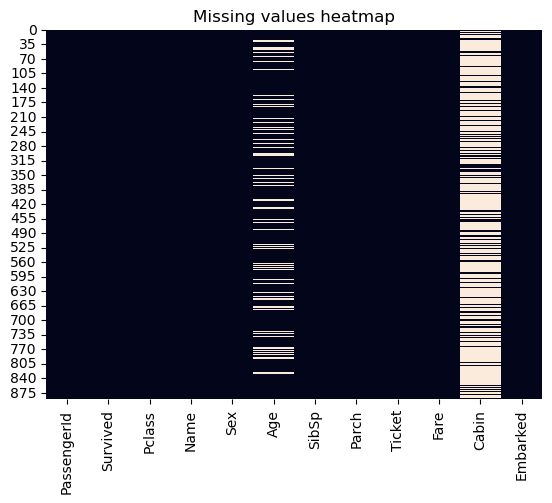

In [1720]:
# veri setindeki eksik değerleri (NaN olan hücreleri) görselleştir
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")

<Axes: >

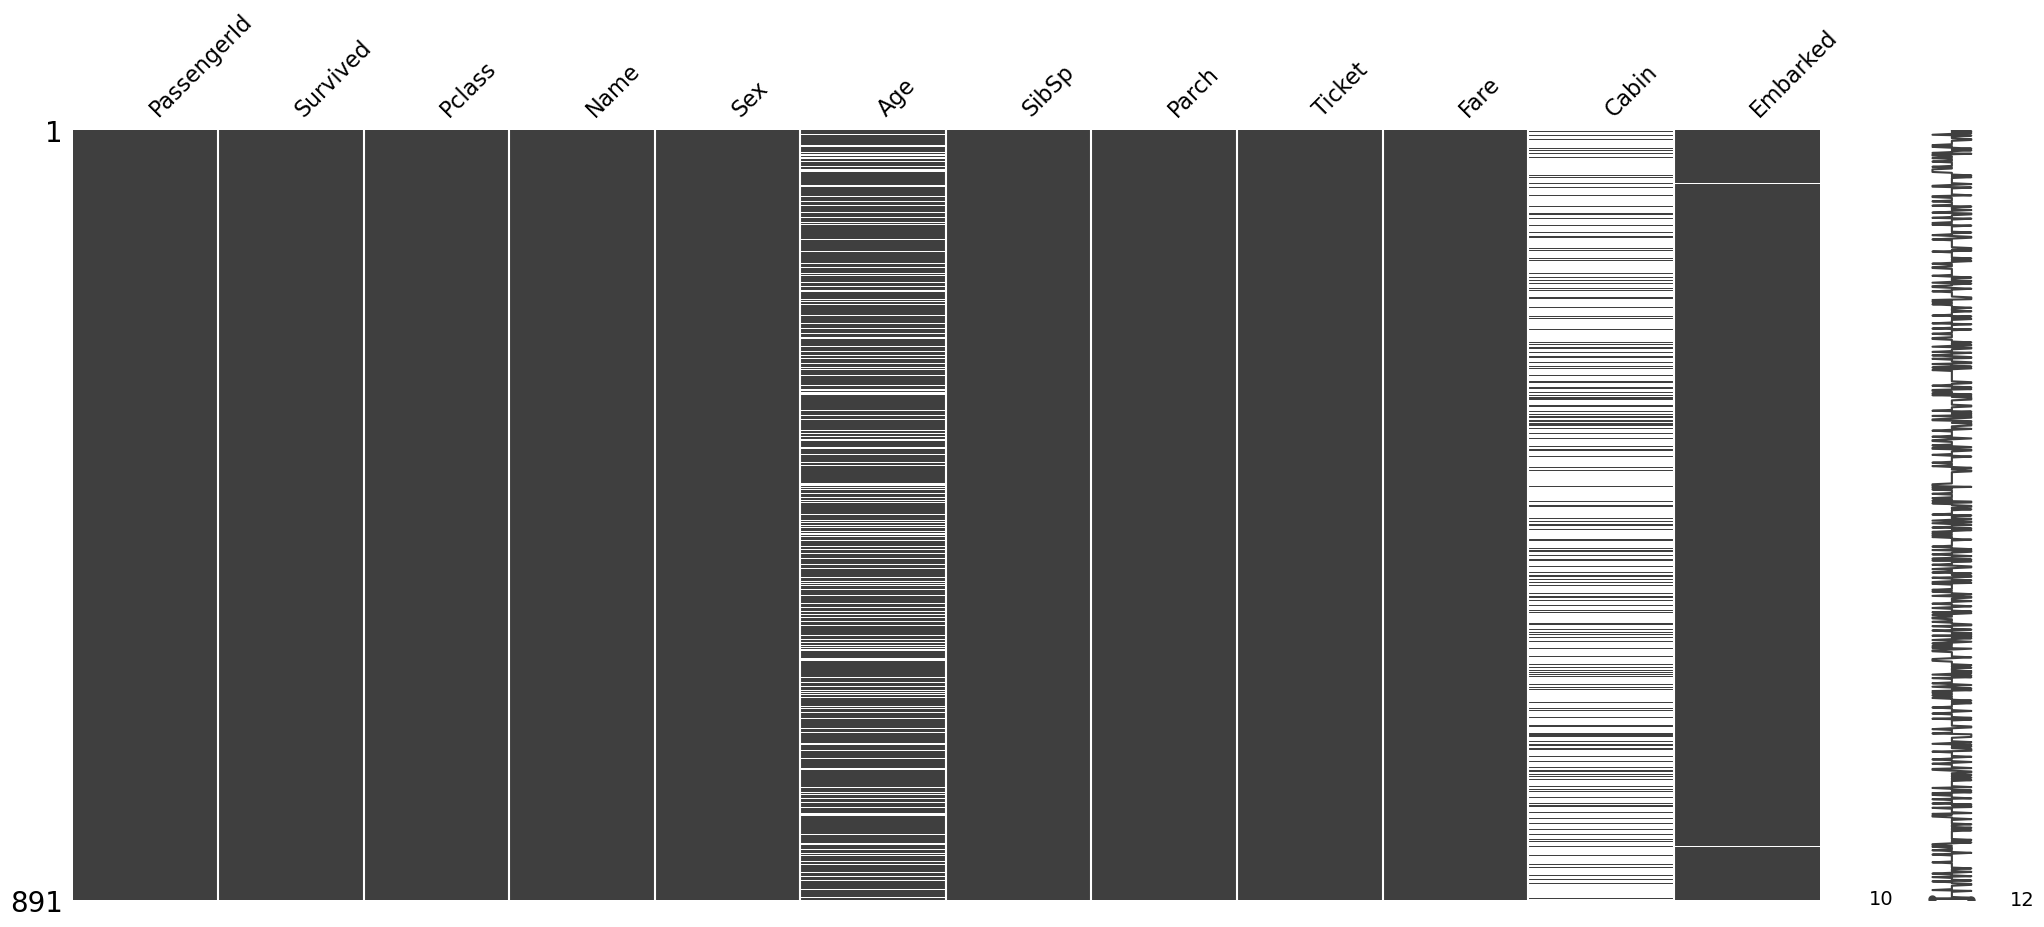

In [1721]:
# Gerekirse kütüphaneyi yükle
#!pip install missingno  
# veri setindeki eksik verileri analiz etmek için özel olarak geliştirilmiş bir kütüphanedir.
import missingno as msno

# Eksik değerleri görselleştir
msno.matrix(df)

In [1722]:
# Eksik verileri olan sütunların ilk 10 satırını görüntüle
# iloc[], index bazlı seçim yapmak için kullanılır.
df[["Age","Embarked","Cabin"]].iloc[0:10]

,Age,Embarked,Cabin
0,22.0,S,NaN
1,38.0,C,C85
2,26.0,S,NaN
3,35.0,S,C123
4,35.0,S,NaN
5,NaN,Q,NaN
6,54.0,S,E46
7,2.0,S,NaN
8,27.0,S,NaN
9,14.0,C,NaN


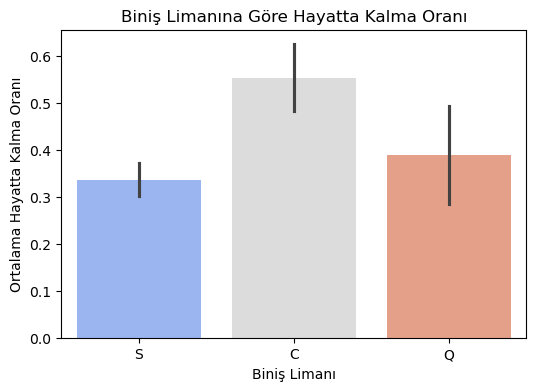

In [1723]:
# Veri Setinin Görselleştirilmesi
# Biniş Limanına Göre Hayatta Kalma Oranı
plt.figure(figsize=(6,4)) # Grafik boyutunu belirle
sns.barplot(x="Embarked", y="Survived", hue="Embarked", data=df, palette="coolwarm", legend=False)
plt.xlabel("Biniş Limanı") # X ekseni etiketi
plt.ylabel("Ortalama Hayatta Kalma Oranı") # Y ekseni etiketi
plt.title("Biniş Limanına Göre Hayatta Kalma Oranı") # Grafik başlığı
plt.show()

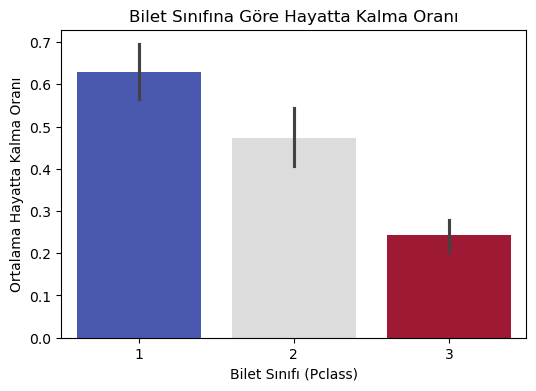

In [1724]:
# Bilet Sınıfına Göre Hayatta Kalma Oranı
plt.figure(figsize=(6,4))  # Grafik boyutunu belirle
sns.barplot(x="Pclass", y="Survived", hue="Pclass", data=df, palette="coolwarm", legend=False)
plt.xlabel("Bilet Sınıfı (Pclass)")  # X ekseni etiketi
plt.ylabel("Ortalama Hayatta Kalma Oranı")  # Y ekseni etiketi
plt.title("Bilet Sınıfına Göre Hayatta Kalma Oranı")  # Grafik başlığı
plt.show()

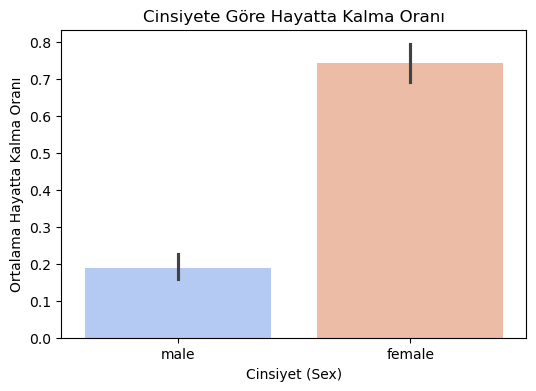

In [1725]:
# Cinsiyete Göre Hayatta Kalma Oranı
plt.figure(figsize=(6,4))  # Grafik boyutunu belirle
sns.barplot(x="Sex", y="Survived", hue="Sex", data=df, palette="coolwarm", legend=False)
plt.xlabel("Cinsiyet (Sex)")  # X ekseni etiketi
plt.ylabel("Ortalama Hayatta Kalma Oranı")  # Y ekseni etiketi
plt.title("Cinsiyete Göre Hayatta Kalma Oranı")  # Grafik başlığı
plt.show()

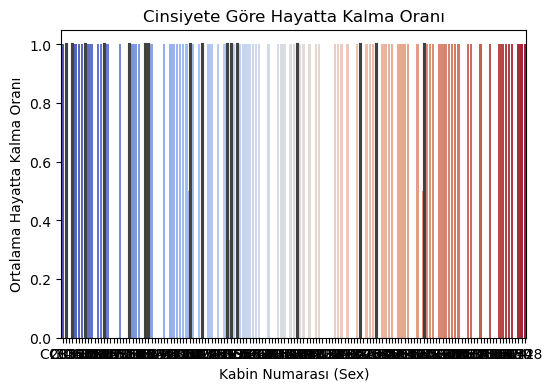

In [1726]:
# Kabin Numarasına Göre Hayatta Kalma Oranı
plt.figure(figsize=(6,4))  # Grafik boyutunu belirle
sns.barplot(x="Cabin", y="Survived", hue="Cabin", data=df, palette="coolwarm", legend=False)
plt.xlabel("Kabin Numarası (Sex)")  # X ekseni etiketi
plt.ylabel("Ortalama Hayatta Kalma Oranı")  # Y ekseni etiketi
plt.title("Cinsiyete Göre Hayatta Kalma Oranı")  # Grafik başlığı
plt.show()

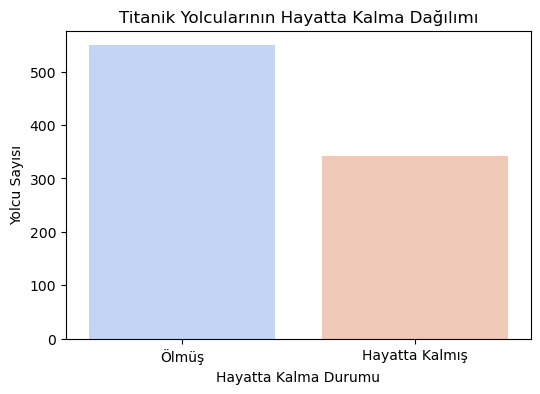

In [1727]:
# Titanik Yolcularının Hayatta Kalma Dağılımı
plt.figure(figsize=(6,4))
Survived = df["Survived"].value_counts()

sns.barplot(y=Survived.values, x=Survived.index, hue=Survived.index, palette="coolwarm", alpha=0.8, legend=False)
plt.title("Titanik Yolcularının Hayatta Kalma Dağılımı", fontsize=12)
plt.xlabel("Hayatta Kalma Durumu", fontsize=10)
plt.ylabel("Yolcu Sayısı", fontsize=10)
plt.xticks(ticks=[0,1], labels=["Ölmüş", "Hayatta Kalmış"])
plt.show()

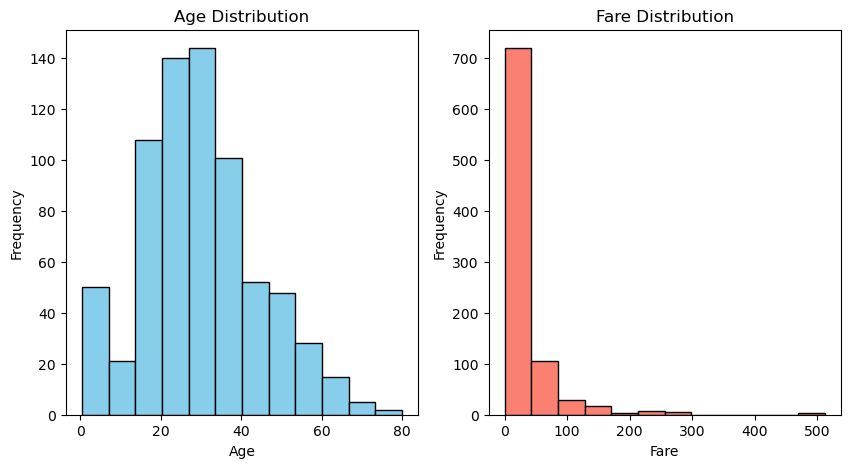

In [1728]:
# Age(Yaş) ve Fare(Bilet ücreti) Sütunlarının Histogram Dağılımları
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Yaş Histogramı
ax1.hist(df["Age"].dropna(), bins=12, color="skyblue", edgecolor="black")
ax1.set_xlabel("Age")
ax1.set_ylabel("Frequency")
ax1.set_title("Age Distribution")

# Bilet Ücreti Histogramı
ax2.hist(df["Fare"], bins=12, color="salmon", edgecolor="black")
ax2.set_xlabel("Fare")
ax2.set_ylabel("Frequency")
ax2.set_title("Fare Distribution")

plt.show()

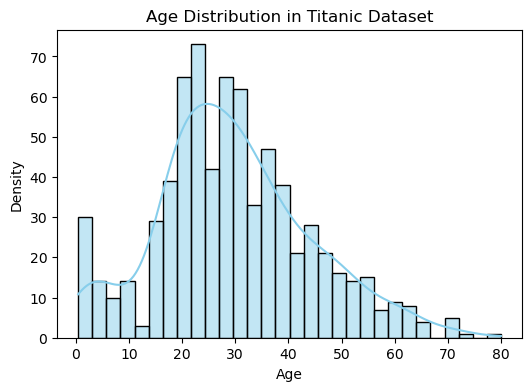

In [1729]:
# Age(Yaş) sütununun yoğunluk grafiği
plt.figure(figsize=(6,4))

# Güncel yöntem: Histogram ve KDE ayrı ayrı çiz
sns.histplot(df["Age"], kde=True, bins=30, color="skyblue")

plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Distribution in Titanic Dataset")
plt.show()

In [1730]:
# İlk 5 satırı göster
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [1731]:
# Eksik verileri kontrol etme
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [1732]:
# Yaşı (Age) eksik olanları ortalama(mean) ile dolduralım
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [1733]:
# İlk 5 satırı göster
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [1734]:
# Eksik verileri kontrol etme
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [1735]:
# Embarked sütunundaki eksik değerlerin bulunduğu satır numaraları
nan_rows = df[df["Embarked"].isnull()].index
print("Embarked sütununda NaN değerlerin bulunduğu satır numaraları:", nan_rows.tolist())

Embarked sütununda NaN değerlerin bulunduğu satır numaraları: [61, 829]


In [1736]:
df[["Embarked"]].iloc[60:70]

,Embarked
60,C
61,NaN
62,S
63,S
64,C
65,C
66,S
67,S
68,S
69,S


In [1737]:
# Limanlara göre binen yolcu sayıları
embarked_counts = df["Embarked"].value_counts()
print(embarked_counts)

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [1738]:
# Embarked sütunundaki eksik değerleri en sık tekrar eden (mode) değerle dolduralım
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [1739]:
print("Eksik değer sayısı Embarked:", df["Embarked"].isnull().sum())

Eksik değer sayısı Embarked: 0


In [1740]:
df[["Embarked"]].iloc[60:70]

,Embarked
60,C
61,S
62,S
63,S
64,C
65,C
66,S
67,S
68,S
69,S


In [1741]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [1742]:
# Cabin sütunu çok fazla eksik veri içerdiği için tamamen kaldırılır.
df.drop(columns=["Cabin"], inplace=True)

In [1743]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [1744]:
# İlk 5 satırı göster
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [1745]:
# Kategorik Verileri Sayısal Hale Getirme

# 1.Yöntem
#df["Sex"] = df["Sex"].map({"male": 1, "female": 0})

# 2.Yöntem (LabelEncoder())
encoder = LabelEncoder()
df["Sex"] = encoder.fit_transform(df["Sex"])

In [1746]:
# İlk 5 satırı göster
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [1747]:
# Limanlara göre binen yolcu sayıları
embarked_counts = df["Embarked"].value_counts()
print(embarked_counts)

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [1748]:
# Embarked sütununu One-Hot Encoding ile dönüştürme ("Embarked_S", "Embarked_C", "Embarked_Q" sütunları eklenir)
#df = pd.get_dummies(df, columns=["Embarked"], drop_first=False)


# Encoder'ı tanımla (sparse yerine sparse_output kullan)
encoder = OneHotEncoder(sparse_output=False, drop=None)  # 'drop=None' tüm sütunları korur

# "Embarked" sütununu dönüştür
encoded_columns = encoder.fit_transform(df[["Embarked"]])

# Yeni sütun isimlerini al
column_names = encoder.get_feature_names_out(["Embarked"])

# Yeni DataFrame oluştur
encoded_df = pd.DataFrame(encoded_columns, columns=column_names)

# Orijinal DataFrame ile birleştir
df = pd.concat([df, encoded_df], axis=1)

# Orijinal "Embarked" sütununu kaldır
df.drop(columns=["Embarked"], inplace=True)

In [1749]:
# İlk 5 satırı göster
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0.0,0.0,1.0


In [1750]:
# Gereksiz Sütunları Kaldırma
# PassengerId, Name ve Ticket sütunları çıkarıldı
df.drop(columns=["PassengerId", "Name", "Ticket"], inplace=True)

In [1751]:
# İlk 5 satırı göster
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,0.0,0.0,1.0


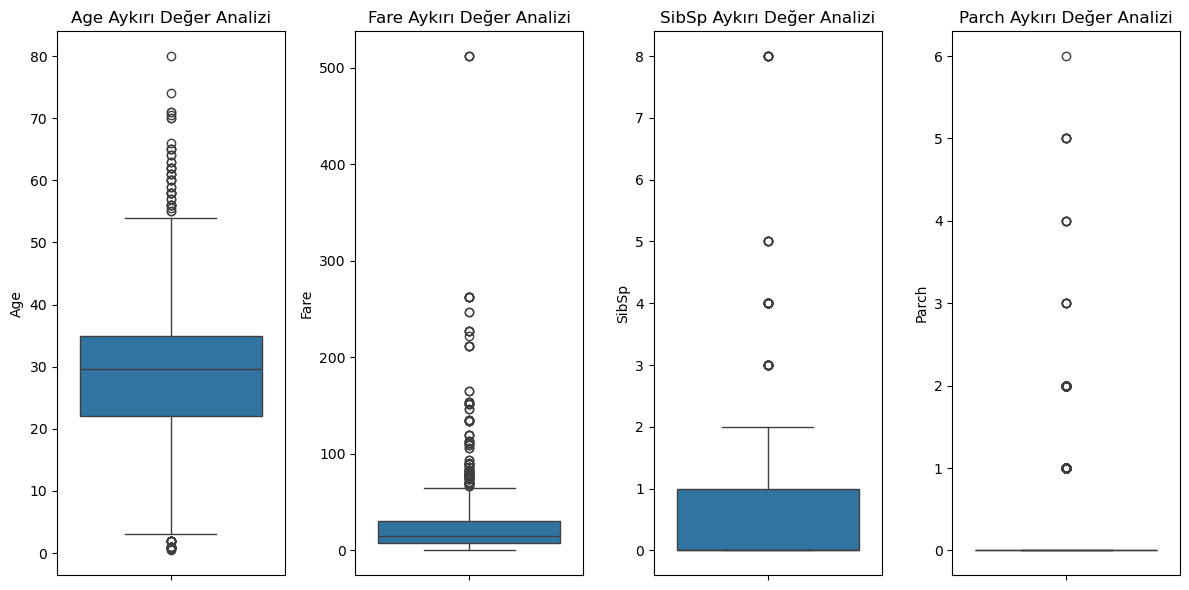

In [1752]:
# Sürekli değişkenler için aykırı değer tespiti
# Sürekli değişkenleri seçelim
continuous_columns = ["Age", "Fare", "SibSp", "Parch"]

# Grafik boyutunu ayarla
plt.figure(figsize=(12,6))

# Her değişken için ayrı kutu grafiği çiz
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(1, len(continuous_columns), i)  # Alt grafikler oluştur
    sns.boxplot(y=df[col])
    plt.title(f"{col} Aykırı Değer Analizi")

plt.tight_layout()  # Grafiklerin üst üste binmesini önler
plt.show()

In [1753]:
# IQR hesaplayarak aykırı değerleri temizleme
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Her değişkende aykırı değerleri temizleyelim
df = remove_outliers(df, "Age")
df = remove_outliers(df, "Fare")
df = remove_outliers(df, "SibSp")
df = remove_outliers(df, "Parch")

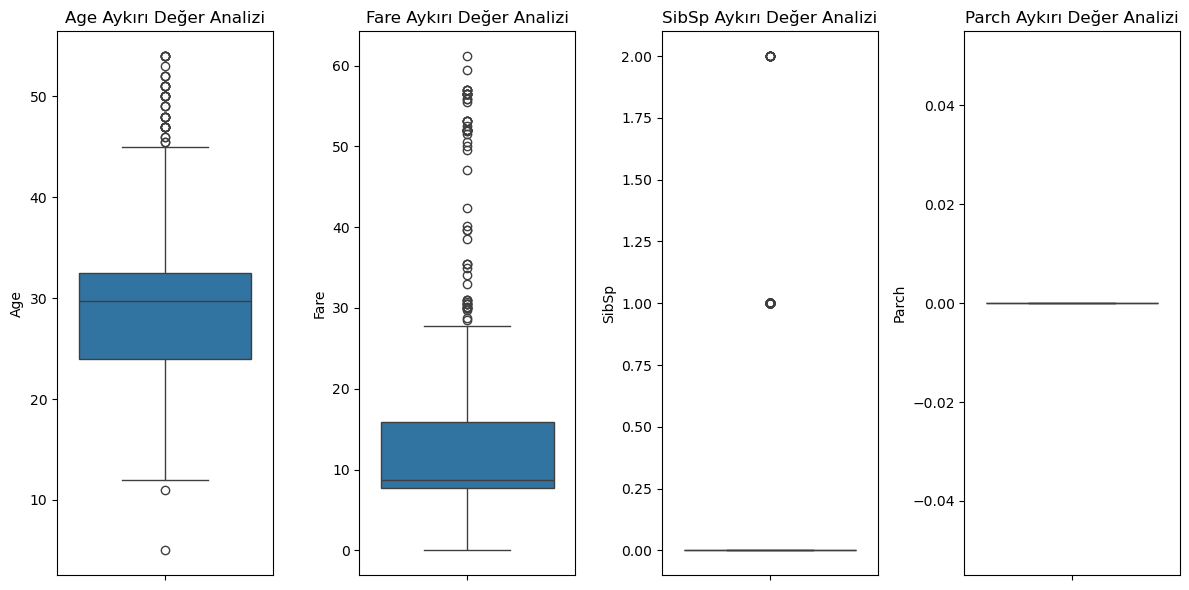

In [1754]:
# Sürekli değişkenleri seçelim
continuous_columns = ["Age", "Fare", "SibSp", "Parch"]

# Grafik boyutunu ayarla
plt.figure(figsize=(12,6))

# Her değişken için ayrı kutu grafiği çiz
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(1, len(continuous_columns), i)  # Alt grafikler oluştur
    sns.boxplot(y=df[col])
    plt.title(f"{col} Aykırı Değer Analizi")

plt.tight_layout()  # Grafiklerin üst üste binmesini önler
plt.show()

In [1755]:
# İlk 5 satırı göster
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.000000,1,0,7.2500,0.0,0.0,1.0
2,1,3,0,26.000000,0,0,7.9250,0.0,0.0,1.0
3,1,1,0,35.000000,1,0,53.1000,0.0,0.0,1.0
4,0,3,1,35.000000,0,0,8.0500,0.0,0.0,1.0
5,0,3,1,29.699118,0,0,8.4583,0.0,1.0,0.0
